In [22]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG16

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [24]:
BATCH_SIZE = 64
EPOCHS = 10

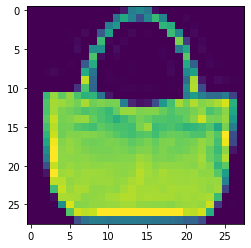

In [25]:
k = x_train[100]
plt.imshow(k)

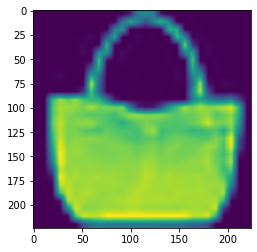

In [26]:
# 224 X 224 사이즈로 resize 합니다.
import cv2
def resize(img):
    return cv2.resize(img, (224, 224))

k = resize(k)
plt.imshow(k)

In [27]:
#모든 img (224, 224) 사이즈로 변경

x_retrain = []
x_retest = []

for i in x_train:
    x_retrain.append(resize(i))
    
for i in x_test:
    x_retest.append(resize(i))

x_retrain = np.array(x_retrain)
x_retest = np.array(x_retest)

print(x_retrain.shape)
print(x_retest.shape)

(60000, 224, 224)
(10000, 224, 224)


In [29]:
# 데이터 정규화 ( 0~1 값 갖도록 )

x_retrain = x_retrain.astype('float32') / 255
x_retest = x_retest.astype('float32') / 255

T-shirt/top


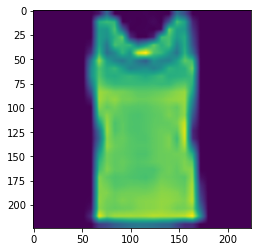

In [30]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankel boot'
]

# 학습 데이터셋 중에서 하나의 이미지 보여주기
img_index = 1005

plt.imshow(x_retrain[img_index])
print(class_name[y_train[img_index]])

In [31]:
model = Sequential()

#RGB값이 없는 흑백이므로 input_shape 마지막 차원 3이 아닌 1
model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [32]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
print(y_train.shape)
print(y_test.shape)

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [34]:
import tensorflow_datasets as tfds

train_data = tf.data.Dataset.from_tensor_slices((x_retrain, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_retest, y_test))

#train_data = train_dataset.batch(BATCH_SIZE).repeat().prefetch(1)
#test_data = test_dataset.batch(BATCH_SIZE).repeat().prefetch(1)

In [35]:
steps_per_epoch= int(len(x_retrain) * 0.8) // BATCH_SIZE + 1
validation_steps= int(len(x_retest) * 0.2) // BATCH_SIZE + 1

print(steps_per_epoch)
print(validation_steps)

751
32


In [36]:
print(train_data)

<TensorSliceDataset element_spec=(TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>


In [37]:
###################################모델 학습#######################################

In [42]:
tf.config.run_functions_eagerly(True)

In [43]:
hist = model.fit(
                x = x_retrain,
                y = y_train,
                epochs=10,
                batch_size=64
                )

C:\Users\이현식\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
  4/938 [..............................] - ETA: 21:12:08 - loss: 2.3841 - accuracy: 0.0977

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

prob_pred = model.predict(x_test)
prob_label = prob_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', prob_label,fmt='%d')